# <center> Homework Project 1 - Linear Regression

### <center> Using linear regression model to predict house price

#### by Lihan (Vicky) Tu

#### Homework Project for Stevens Course CS559: Machine Learning Fundamentals and Applications

#### Note: Quality of model subject to the quality of the data such as number of observations or features available

#### The overall Numpy implementation of the linear regression object was provided by the course. And I adjusted to make it trained via stochastic gradient descent instead of simple GD.

# Question 1 NumPy Linear Regression

## a) Data Preprocessing, EDA and training-testing split

In [735]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from random import random

#### A. Load Data

In [736]:
df = pd.read_csv('Real estate.csv')

In [737]:
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### B. Exploratory Data Analysis (EDA)

In [738]:
df.shape

(414, 8)

In [739]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [740]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


##### There is no categorical data.

In [741]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

##### There is no missing values. Thank you Professor!

#### C. Visualizations

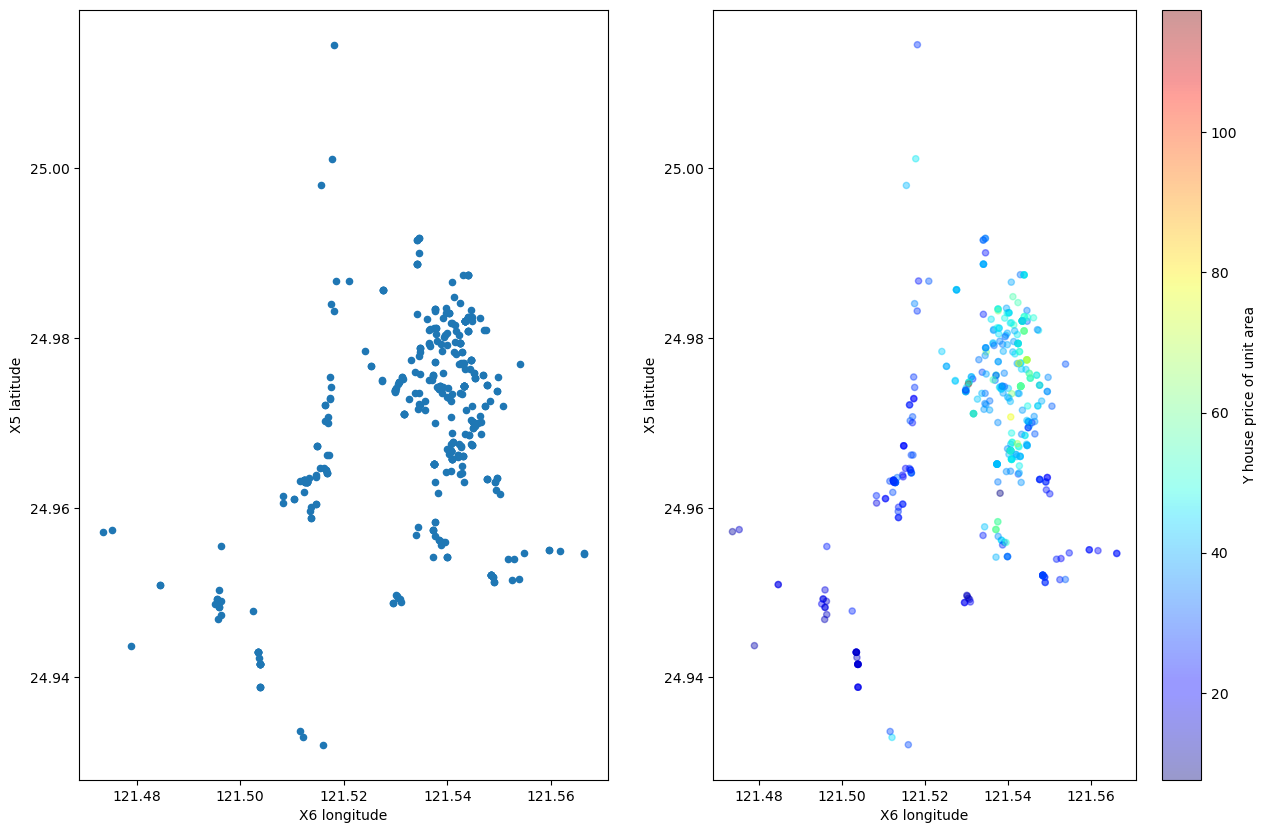

In [742]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10))
df.plot(kind="scatter",x="X6 longitude",y="X5 latitude",ax=ax1)
df.plot(kind="scatter",x="X6 longitude",y="X5 latitude", alpha=0.4, c="Y house price of unit area", cmap=plt.get_cmap("jet"),colorbar=True, ax=ax2)
plt.show()

##### "X5 latitude" and "X6 longitude" do seem to have impact on "Y house price of unit area". These two also appear correlated with each other.

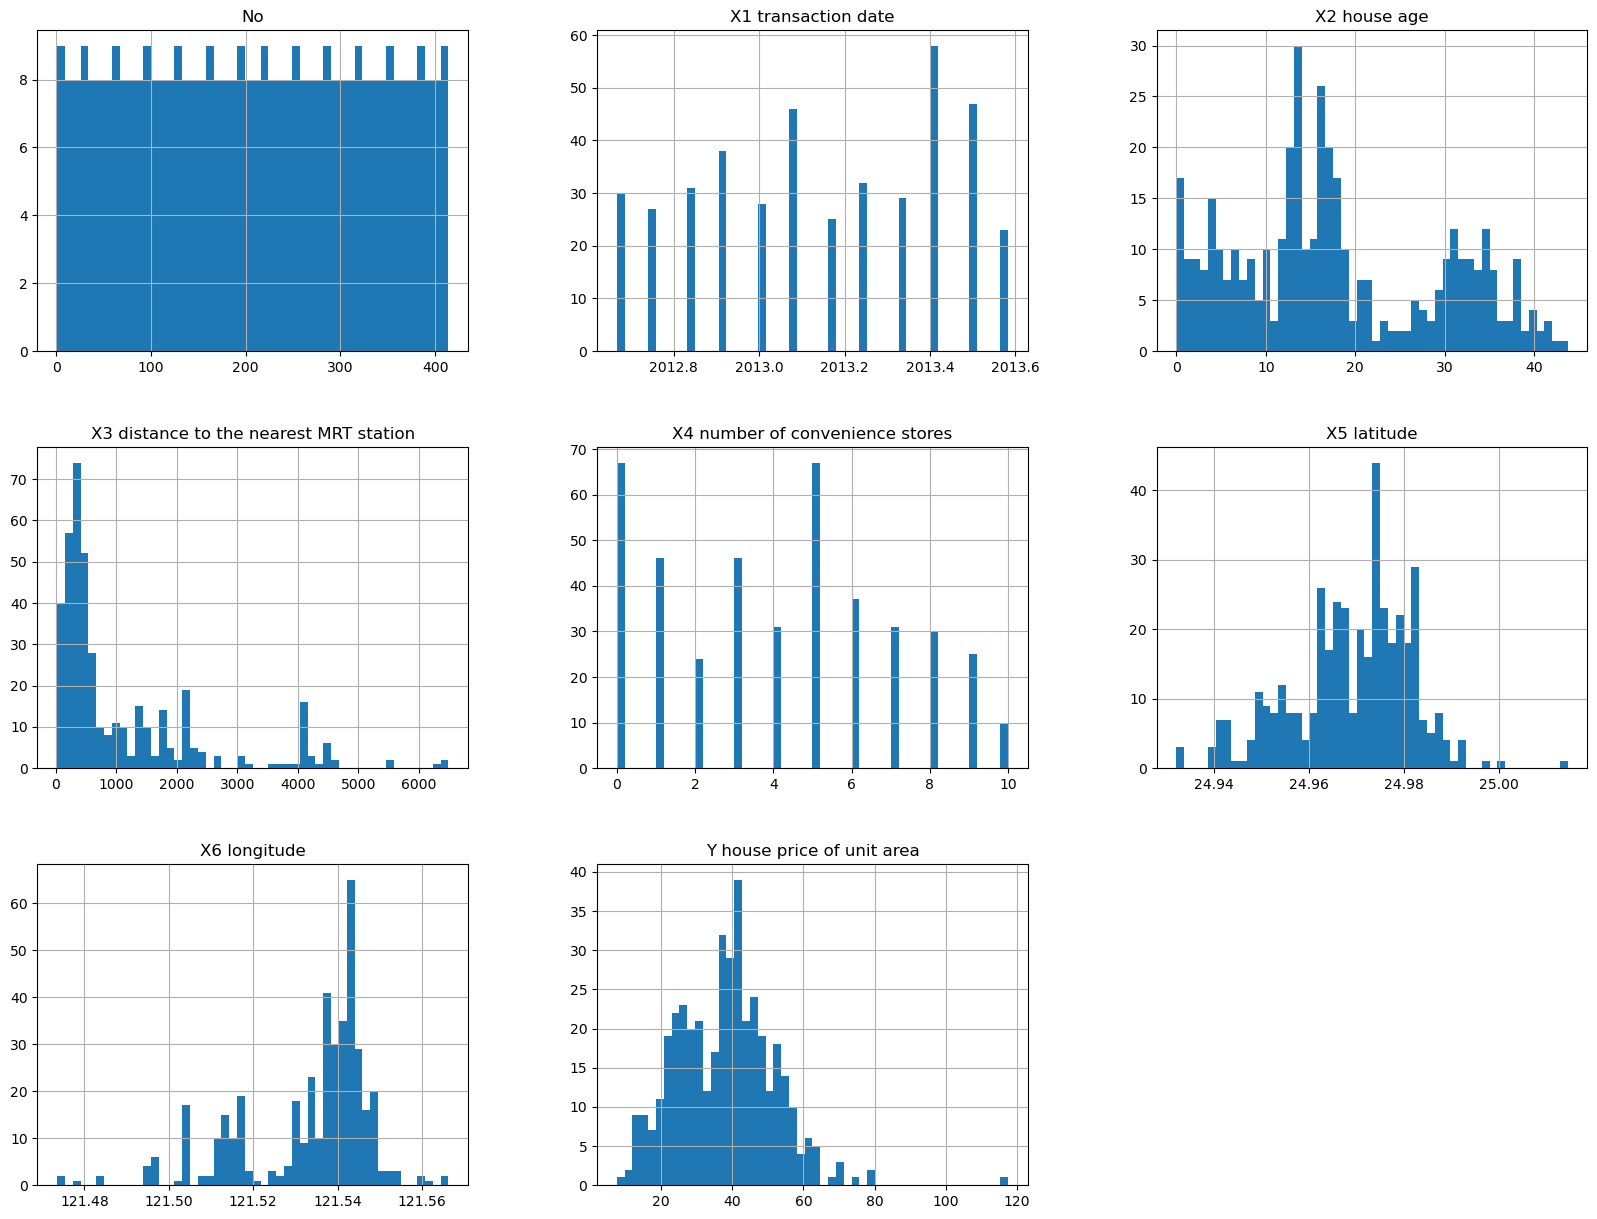

In [743]:
df.hist(bins=50, figsize=(20,15))
plt.show()

##### "X2 house age", "X3 distance to the nearest MRT station", and "Y house price of unit area" are all right-skewed tos ome degree based on the charts above.

##### "No" and "X1 transaction date" have no distributions.

##### qqplot for "X2 house age" below:

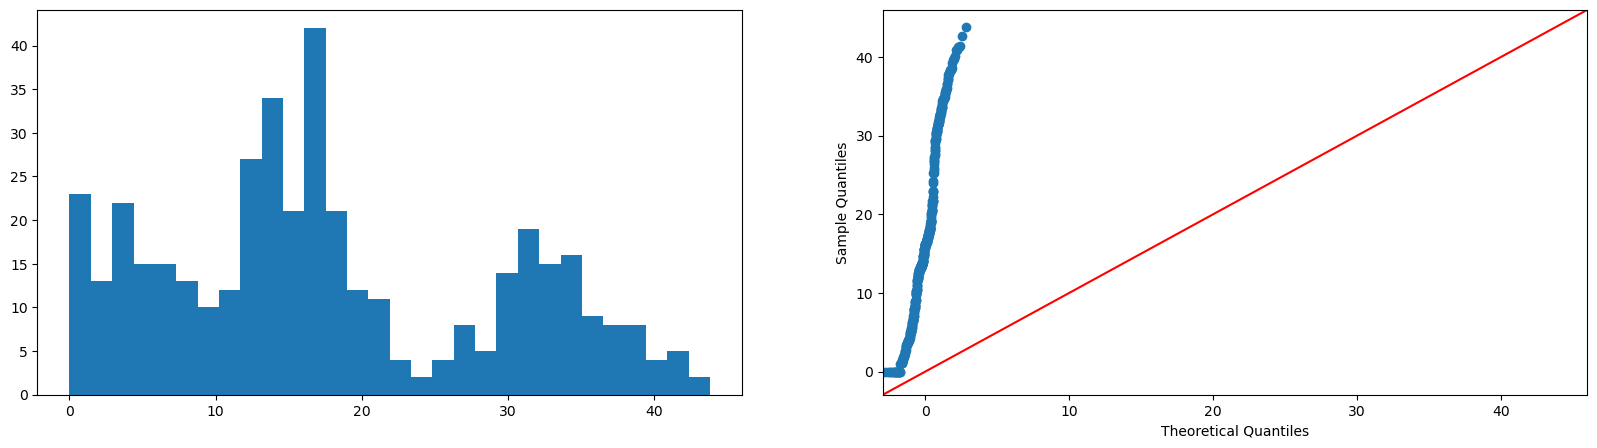

In [744]:
s = df['X2 house age'].to_numpy()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
ax1.hist(s,bins=30)
fig = sm.qqplot(s, line='45',ax=ax2)
plt.show()

##### "X2 house age" is right skewed and not normally distributed

##### qqplot for "X3 distance to the nearest MRT station" below:

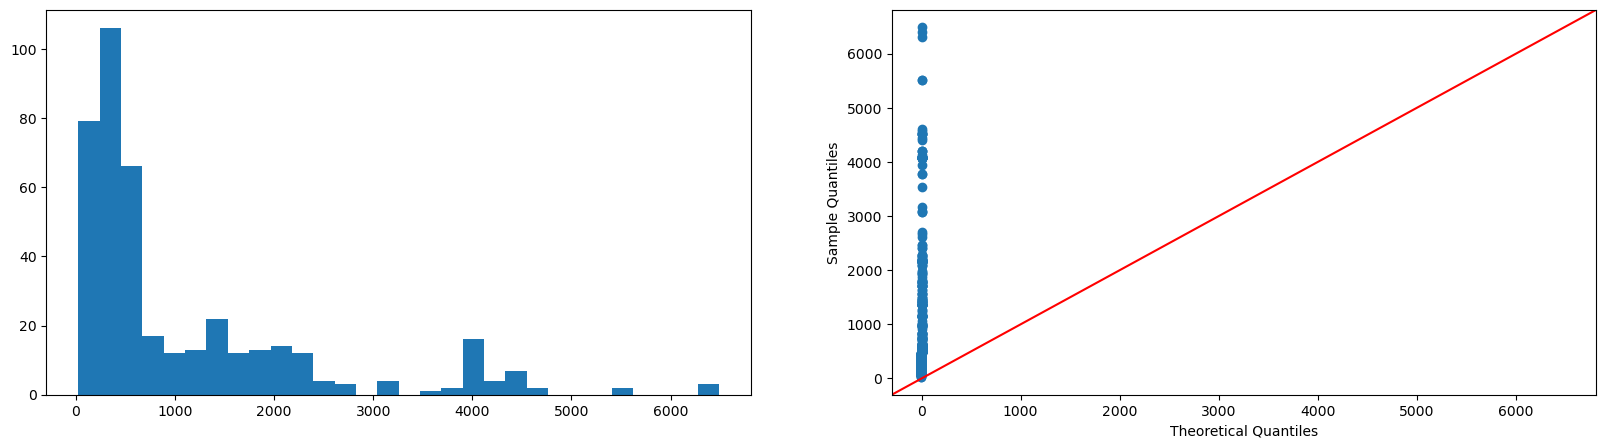

In [745]:
s = df['X3 distance to the nearest MRT station'].to_numpy()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
ax1.hist(s,bins=30)
fig = sm.qqplot(s, line='45',ax=ax2)
plt.show()

##### "X3 distance to the nearest MRT station" is severely right skewed and not normally distributed

##### qqplot for "X4 number of convenience stores" below:

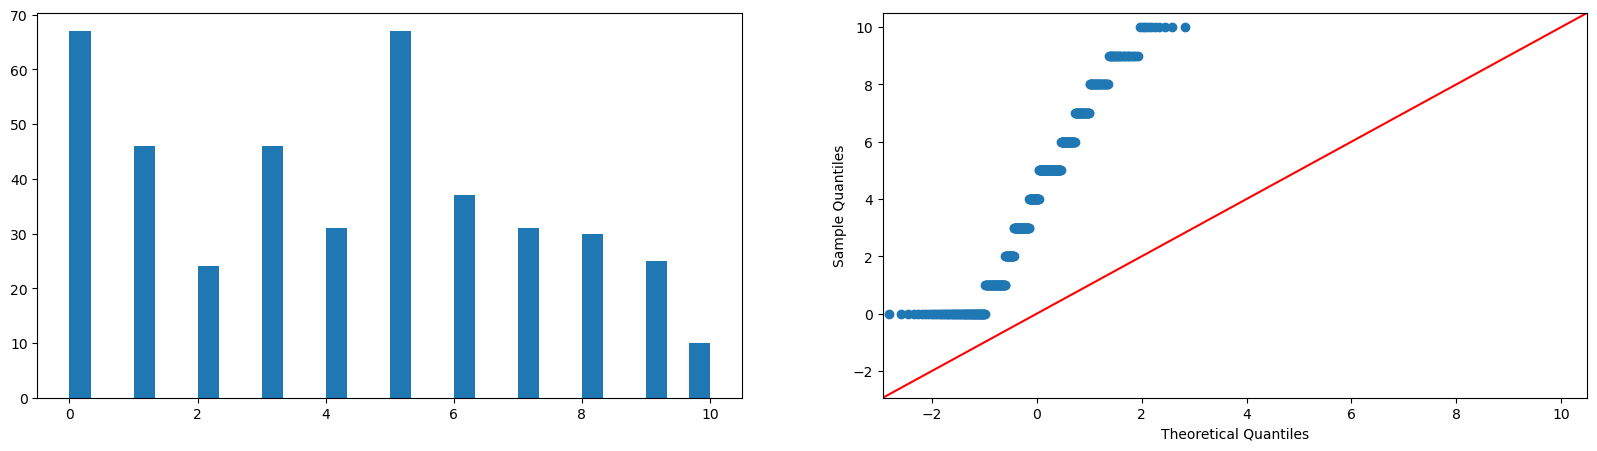

In [746]:
s = df['X4 number of convenience stores'].to_numpy()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
ax1.hist(s,bins=30)
fig = sm.qqplot(s, line='45',ax=ax2)
plt.show()

##### "X4 number of convenience stores" is right skewed and not normally distributed

##### qqplot for "Y house price of unit area" below:

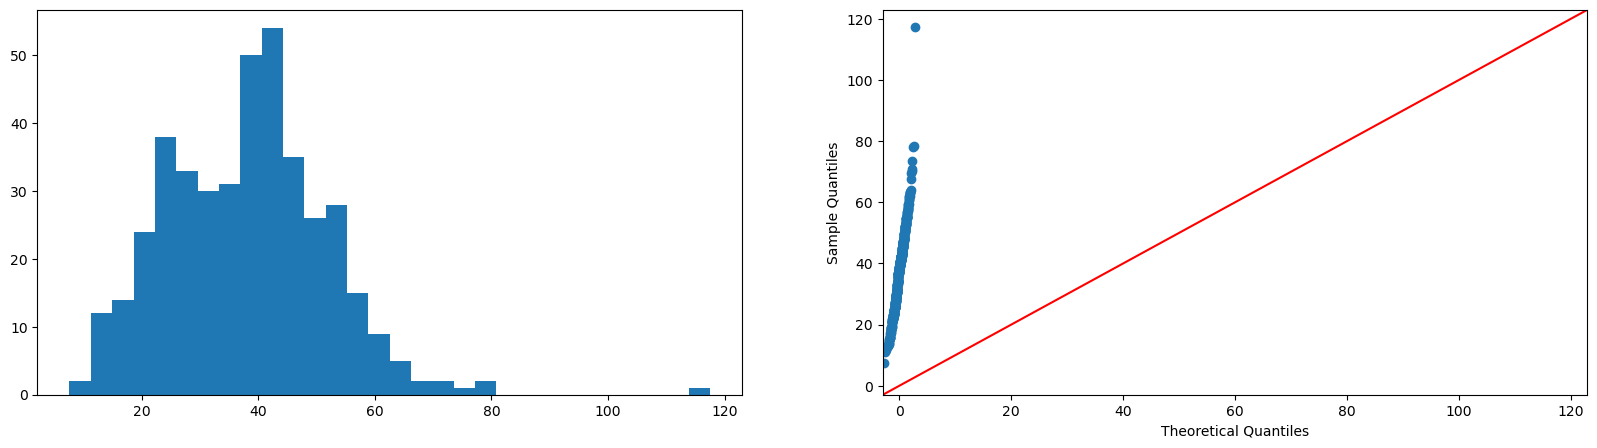

In [747]:
s = df['Y house price of unit area'].to_numpy()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
ax1.hist(s,bins=30)
fig = sm.qqplot(s, line='45',ax=ax2)
plt.show()

##### "Y house price of unit area" is right skewed and not normally distributed

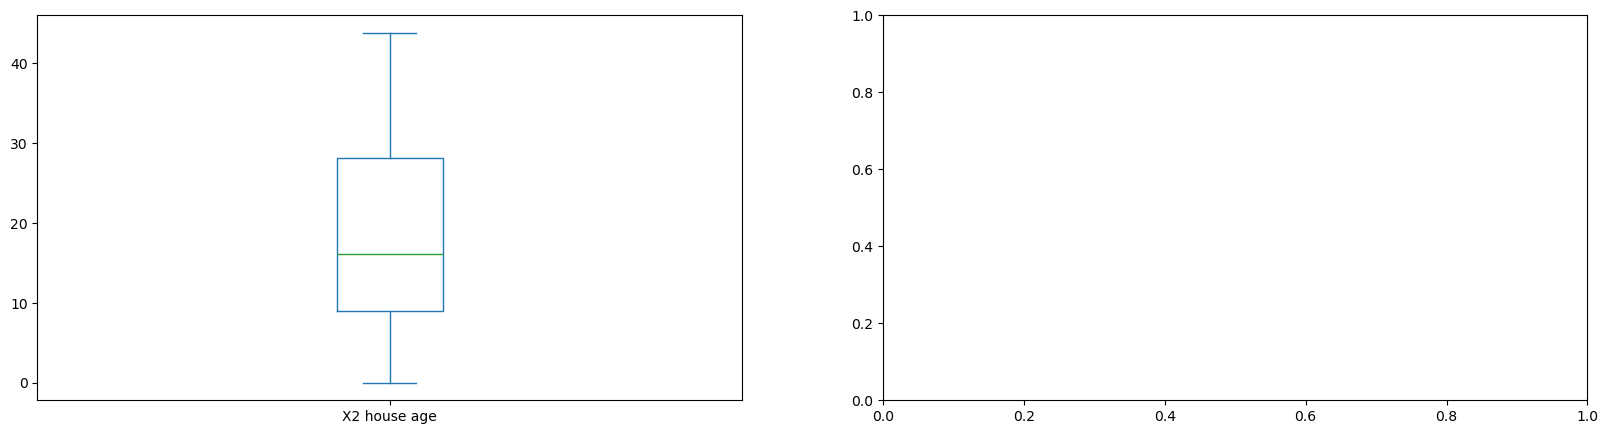

In [748]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
df['X2 house age'].plot.box(ax=ax1)
#df_ = df[df['X2 house age']<=33]
#df_['X2 house age'].plot.box(ax=ax2)
plt.show()

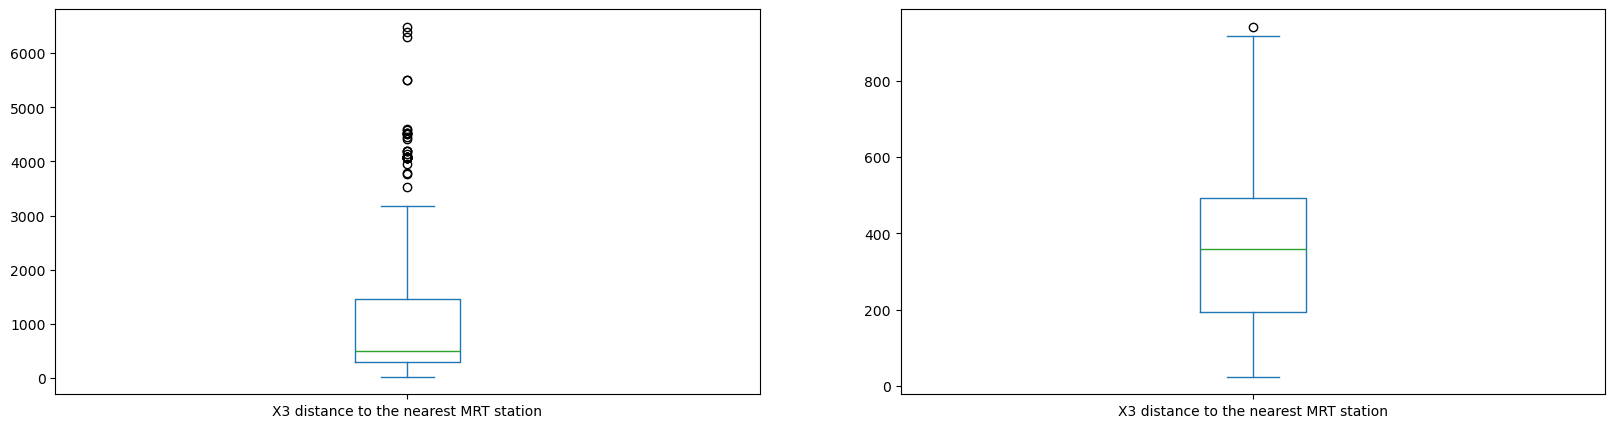

In [749]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
df['X3 distance to the nearest MRT station'].plot.box(ax=ax1)
df_ = df[df['X3 distance to the nearest MRT station']<=950]
df_['X3 distance to the nearest MRT station'].plot.box(ax=ax2)
plt.show()

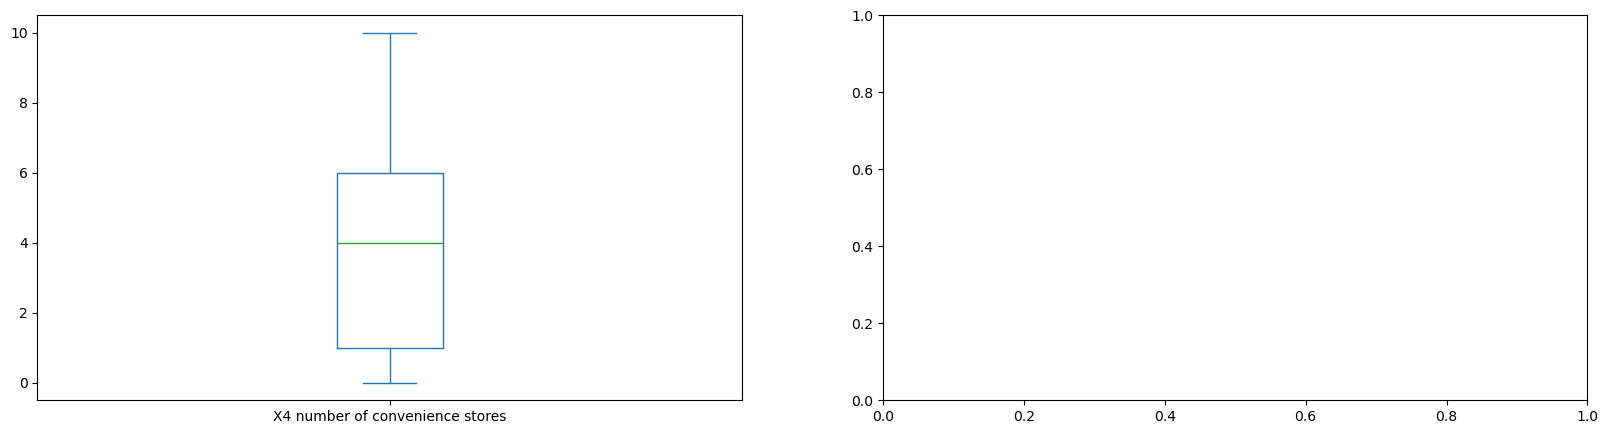

In [750]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
df['X4 number of convenience stores'].plot.box(ax=ax1)
#df_ = df[df['X4 number of convenience stores']<=3000]
#df_['X4 number of convenience stores'].plot.box(ax=ax2)
plt.show()

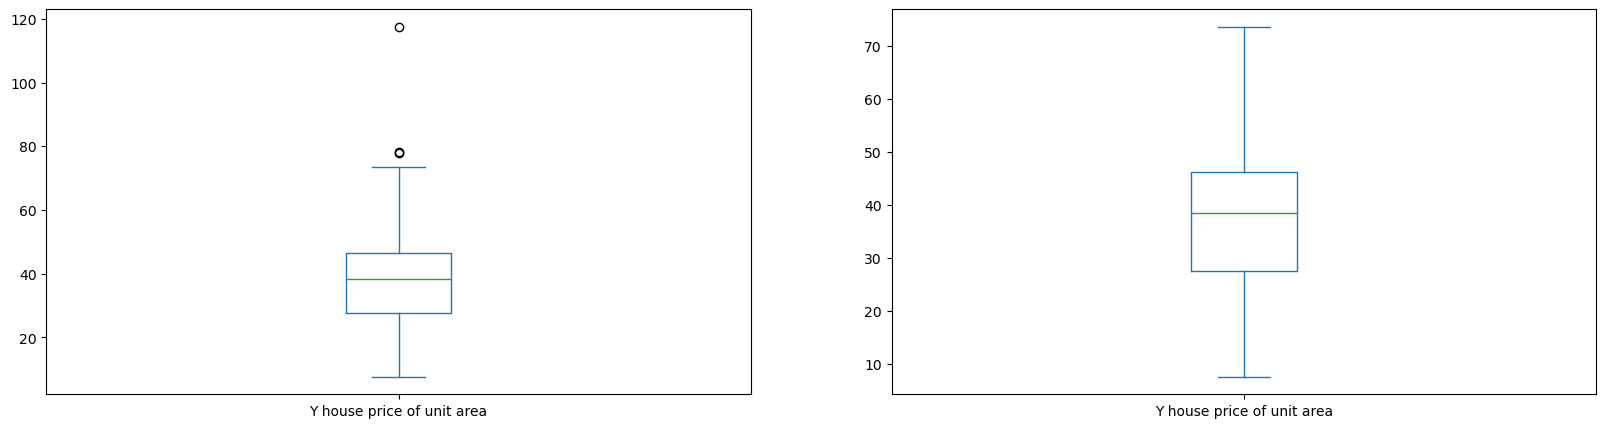

In [751]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
df['Y house price of unit area'].plot.box(ax=ax1)
df_ = df[df['Y house price of unit area']<=75]
df_['Y house price of unit area'].plot.box(ax=ax2)
plt.show()

#### C2. Correlation between features and to the target

In [752]:
corr_matrix = df[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude','Y house price of unit area']].corr()
corr_matrix

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


##### Except for feature "X1 transaction date" , the other features all show meaningful correlations with the dependent variable Y. Considering dropping "X1 transaction date" because it demonstrate little to no correlation with Y nor does it has any significatn correlation with any of the other features.

##### "X5 latitude" and "X6 longitude" are correlated with each other, and with "X3 distance to the nearest MRT station","X4 number of convenience stores", and "Y house price of unit area" . Especially "X6 longitude"  is strongly correlated with 'X3 distance to the nearest MRT station' and might need to be dropped. I could either try a new feature or only keeping "X5 latitude". 

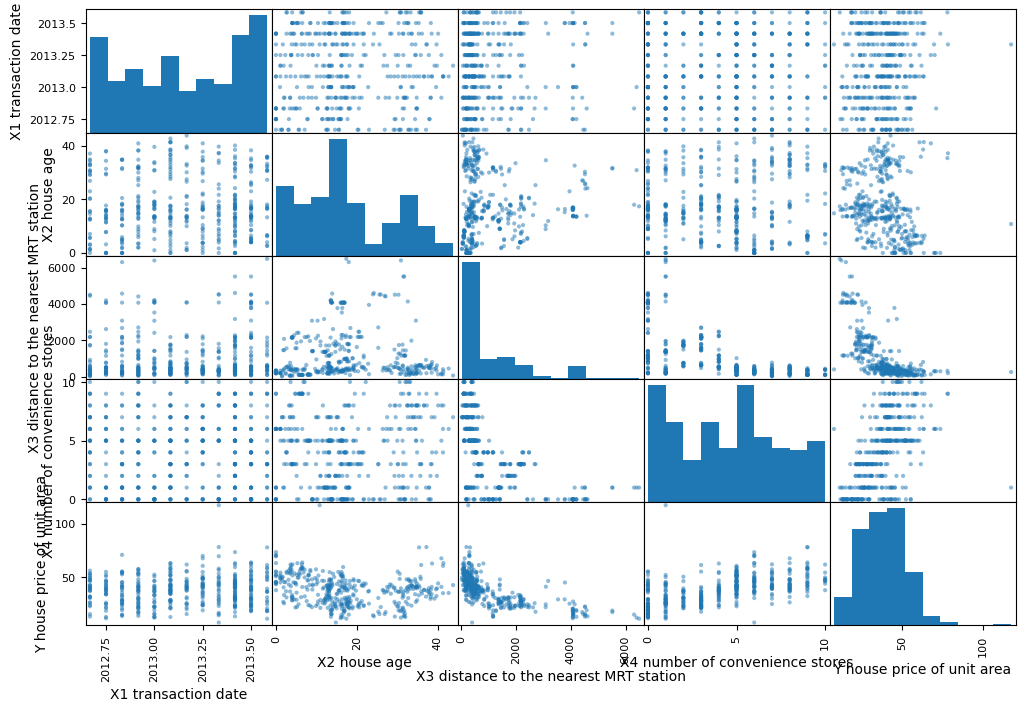

In [753]:
features = ['X1 transaction date', 'X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','Y house price of unit area']
scatter_matrix(df[features], figsize=(12,8))
plt.show()

##### "X3 distance to the nearest MRT station" is somewhat negatively correlated with "X4 number of convenience stores". However the negative correlation is not very strong.

#### D. Data Preprocessing

##### As established earlier, there is no missing value nor categorical value to handle from this dataset. 

##### Column "No" has no relevance to the analysis so dropping it. 

##### As determined during EDA, dropping feature "X1 transaction date" since it shows little to no coorelation with any of the features as well as Y variable in the dataset.

#####  "X3 distance to the nearest MRT station" and "X4 number of convenience stores" are has a negative correlation however it's not that strong. Logistically these two cannot really be categorized as the same thing. Both factors could be influencing the demand for housing therefore I choose to keep both of them. 

In [754]:
df_regression = df.drop('No',axis = 1)

In [755]:
df_regression = df_regression.drop('X1 transaction date', axis = 1)
df_regression.head(5)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


#### D2. Feature Engineering

##### NEW FEATURE CREATION: "X5 latitude" and "X6 longitude" are very similar in how they are distributed as well as how they are correlated with the other features. Instead of removing any of them, I will try to combine them by creating a new feature called "X7 location". This new feature will be calculated the same way a vector length is calculated, treating "X6 longitude" as the x-coordinate and "X5 latitude" as the y-coordinate:

$$
  \sqrt{("X5 \ latitude")^2 + ("X6 \ longitude")^2}
$$

In [756]:
df_regression["X7 location"]=(df_regression["X5 latitude"].pow(2)+ df_regression["X6 longitude"].pow(2)).pow(0.5)
df_regression.head(5)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X7 location
0,32.0,84.87882,10,24.98298,121.54024,37.9,124.081341
1,19.5,306.59470,9,24.98034,121.53951,42.2,124.080095
2,13.3,561.98450,5,24.98746,121.54391,47.3,124.085838
3,13.3,561.98450,5,24.98746,121.54391,54.8,124.085838
4,5.0,390.56840,5,24.97937,121.54245,43.1,124.082779


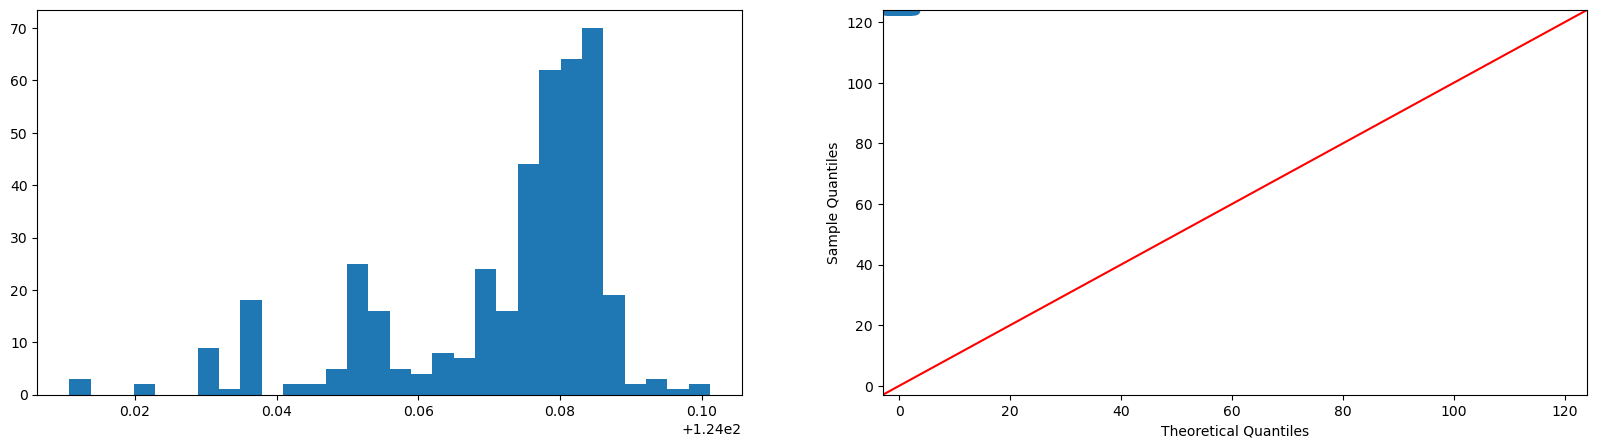

In [757]:
s = df_regression['X7 location'].to_numpy()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
ax1.hist(s,bins=30)
fig = sm.qqplot(s, line='45',ax=ax2)
plt.show()

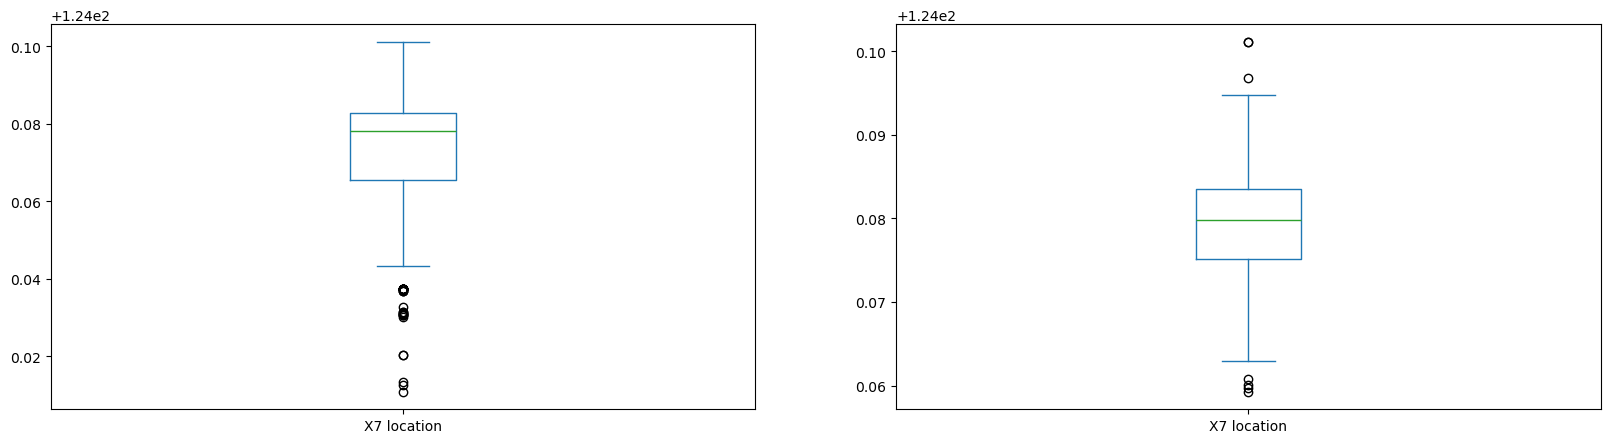

In [758]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
df_regression['X7 location'].plot.box(ax=ax1)
df_ = df_regression[df_regression['X7 location']>=124.058]
df_['X7 location'].plot.box(ax=ax2)
plt.show()

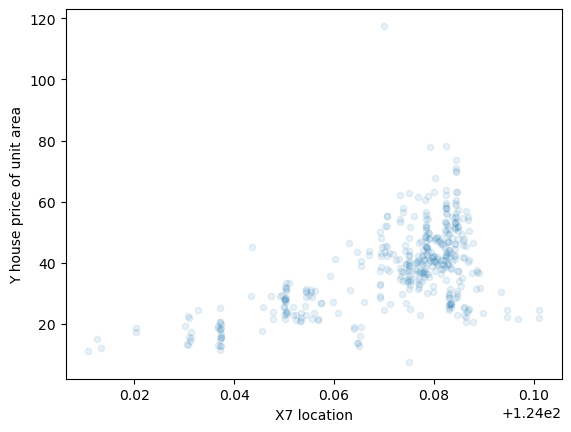

In [759]:
df_regression.plot(kind="scatter", x="X7 location",y="Y house price of unit area", alpha=0.1)
plt.show()

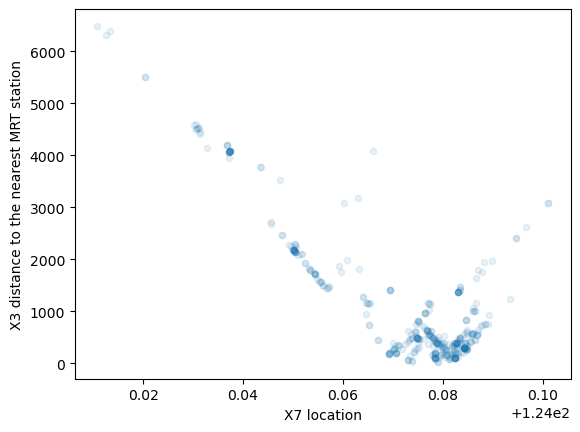

In [760]:
df_regression.plot(kind="scatter", x="X7 location",y="X3 distance to the nearest MRT station", alpha=0.1)
plt.show()

##### Newly created feature demonstrate a positive correlation with Y. But it has a even more stronger correlation with another feature "X3 distance to the nearest MRT station" therefore dropping the newly created feature created from "X5 latitude" and "X6 longitude" and only keeping "X5 latitude".

In [761]:
#df_regression = df_regression.drop('X5 latitude',axis = 1)
df_regression = df_regression.drop('X6 longitude',axis = 1)
df_regression = df_regression.drop('X7 location',axis = 1)
df_regression.head(5)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,37.9
1,19.5,306.59470,9,24.98034,42.2
2,13.3,561.98450,5,24.98746,47.3
3,13.3,561.98450,5,24.98746,54.8
4,5.0,390.56840,5,24.97937,43.1


##### Now I will normalize the data so they are scaled and right-skewed distribution gets normalized. Since the distributions of the data is not clear using normalization instead of standardization.

In [762]:
df_regression['X2 house age'] = (df_regression['X2 house age'] - df_regression['X2 house age'].min()) / (df_regression['X2 house age'].max() - df_regression['X2 house age'].min())
df_regression['X4 number of convenience stores'] = (df_regression['X4 number of convenience stores'] - df_regression['X4 number of convenience stores'].min()) / (df_regression['X4 number of convenience stores'].max()-df_regression['X4 number of convenience stores'].min())
df_regression['X3 distance to the nearest MRT station'] = (df_regression['X3 distance to the nearest MRT station'] - df_regression['X3 distance to the nearest MRT station'].min()) / (df_regression['X3 distance to the nearest MRT station'].max()-df_regression['X3 distance to the nearest MRT station'].min())
df_regression['Y house price of unit area'] = (df_regression['Y house price of unit area'] - df_regression['Y house price of unit area'].min()) / (df_regression['Y house price of unit area'].max()-df_regression['Y house price of unit area'].min())
#df_regression['X7 location'] = (df_regression['X7 location'] - df_regression['X7 location'].min()) / (df_regression['X7 location'].max()-df_regression['X7 location'].min())
df_regression['X5 latitude'] = (df_regression['X5 latitude'] - df_regression['X5 latitude'].min()) / (df_regression['X5 latitude'].max()-df_regression['X5 latitude'].min())
#df_regression['X6 longitude'] = (df_regression['X6 longitude'] - df_regression['X6 longitude'].min()) / (df_regression['X6 longitude'].max()-df_regression['X6 longitude'].min())
df_regression.head(5)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,Y house price of unit area
0,0.730594,0.009513,1.0,0.616941,0.275705
1,0.445205,0.043809,0.9,0.584949,0.314832
2,0.303653,0.083315,0.5,0.671231,0.361237
3,0.303653,0.083315,0.5,0.671231,0.429481
4,0.114155,0.056799,0.5,0.573194,0.323021


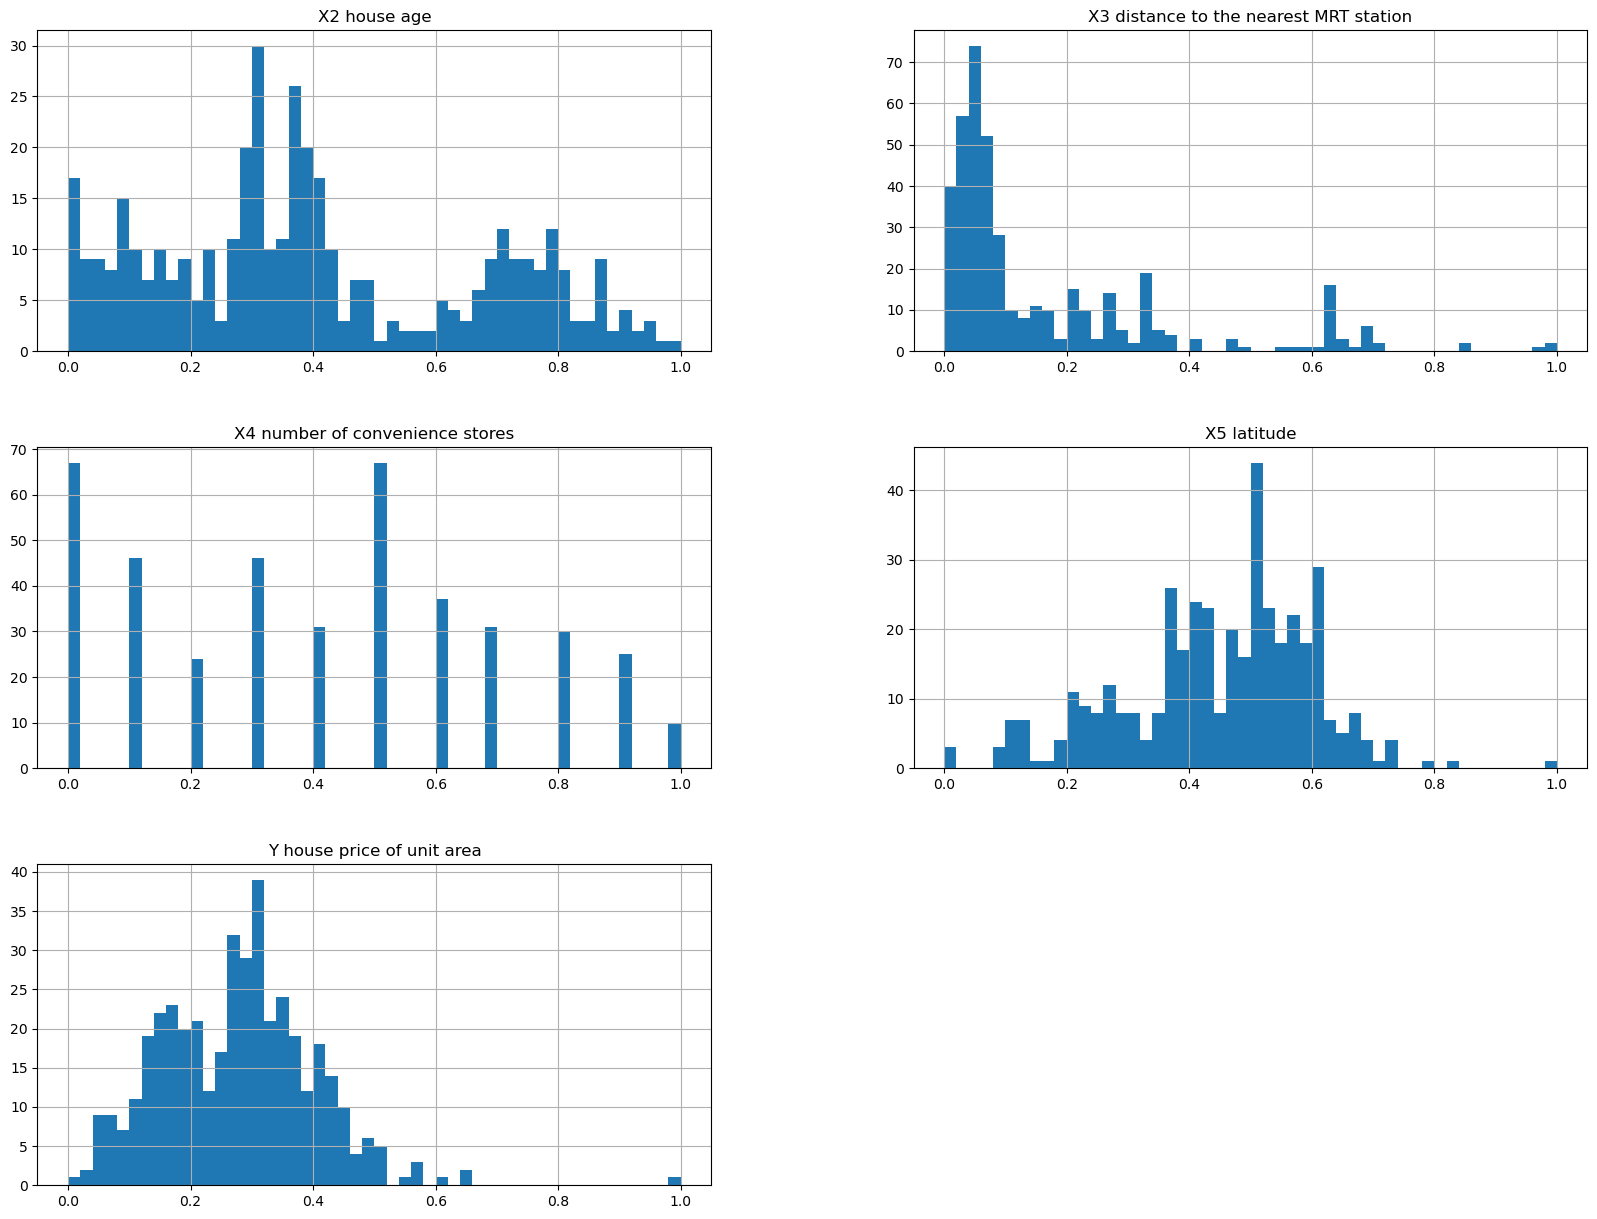

In [763]:
df_regression.hist(bins=50, figsize=(20,15))
plt.show()

##### Now for removing "Y house price of unit area" outliers:

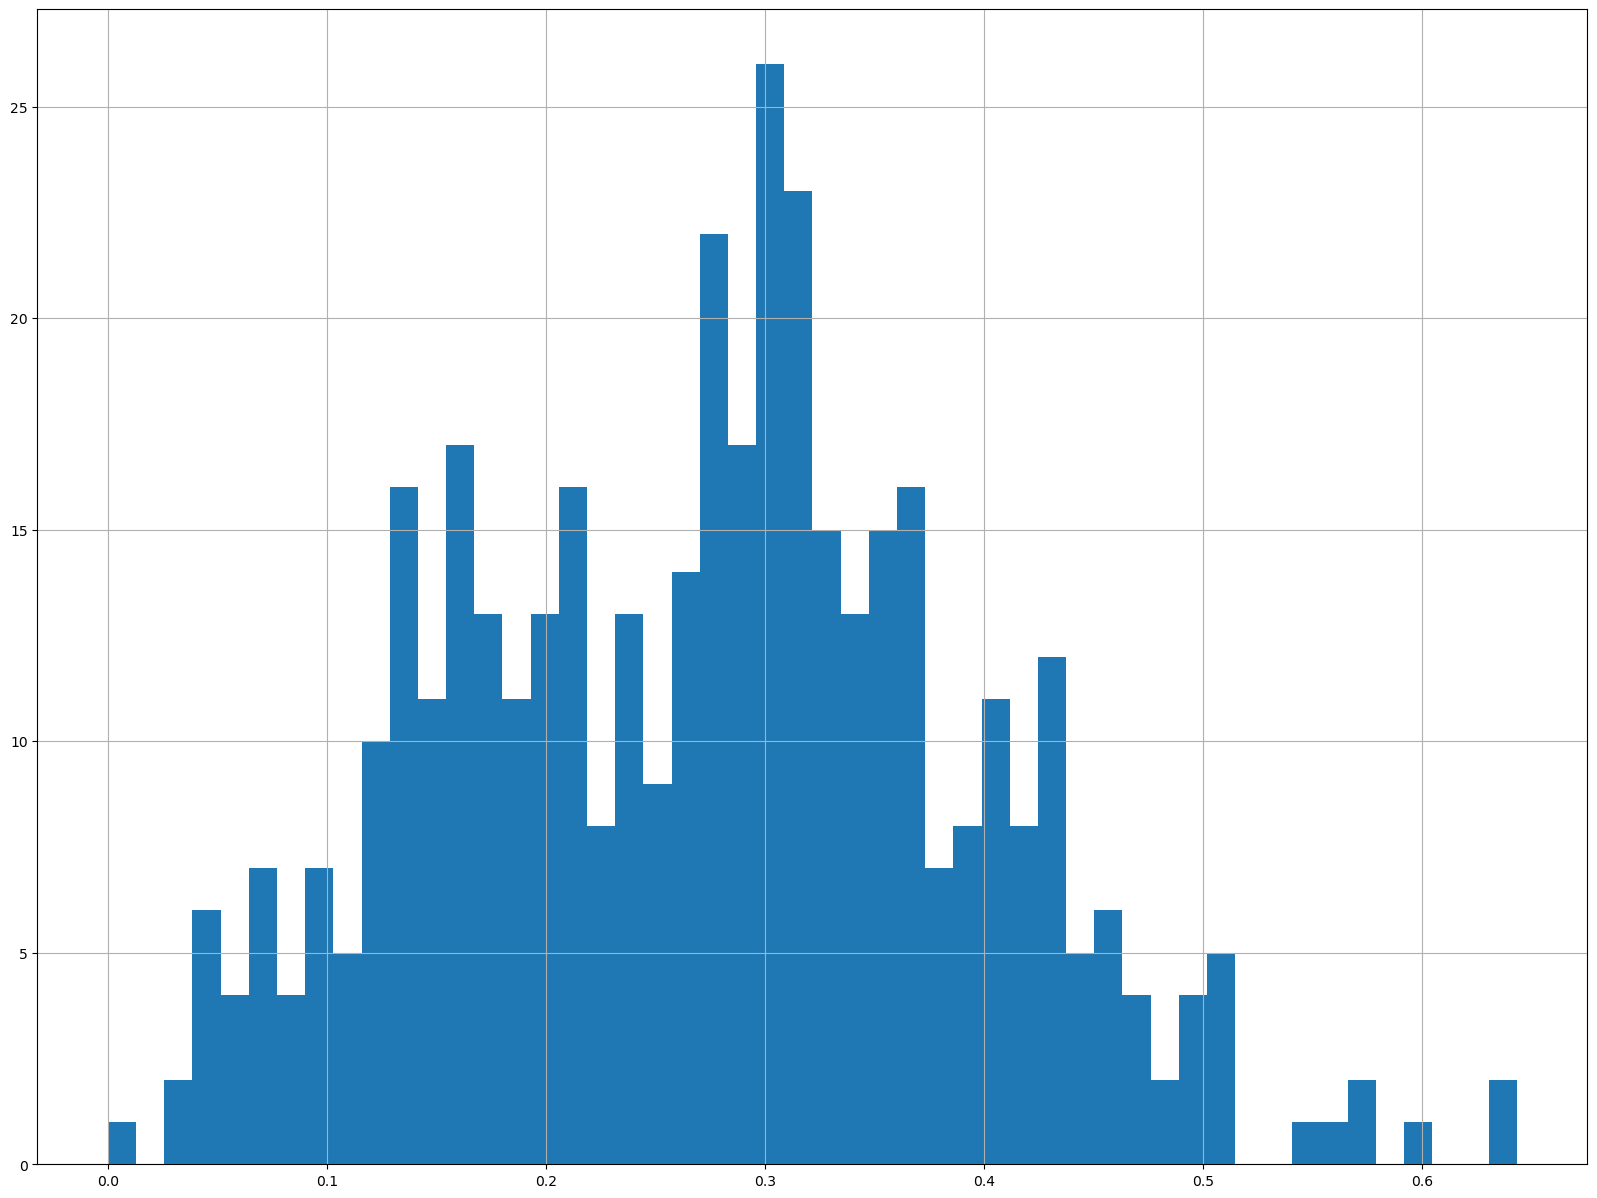

In [764]:
df_regression = df_regression[df_regression['Y house price of unit area']<=0.75]
df_regression['Y house price of unit area'].hist(bins=50, figsize=(20,15))
plt.show()

In [765]:
df_regression.shape

(413, 5)

In [766]:
corr_matrix = df_regression[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','Y house price of unit area']].corr()
corr_matrix

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,Y house price of unit area
X2 house age,1.000000,0.024676,0.048131,0.055119,-0.210985
X3 distance to the nearest MRT station,0.024676,1.000000,-0.605328,-0.590805,-0.694009
X4 number of convenience stores,0.048131,-0.605328,1.000000,0.445994,0.612635
X5 latitude,0.055119,-0.590805,0.445994,1.000000,0.563954
Y house price of unit area,-0.210985,-0.694009,0.612635,0.563954,1.000000


In [767]:
df_regression.head(5)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,Y house price of unit area
0,0.730594,0.009513,1.0,0.616941,0.275705
1,0.445205,0.043809,0.9,0.584949,0.314832
2,0.303653,0.083315,0.5,0.671231,0.361237
3,0.303653,0.083315,0.5,0.671231,0.429481
4,0.114155,0.056799,0.5,0.573194,0.323021


#### The pre-processed data above, "df_regression", will be the data I build my linear regression model on.

In [768]:
X = df_regression.drop('Y house price of unit area', axis = 1)

In [769]:
y = df_regression['Y house price of unit area']

#### E. Train_Test Split

In [770]:
ratio = 0.75
 
total_rows = df_regression.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
X_training = X[0:train_size]
X_testing = X[train_size:]
y_training = y[0:train_size]
y_testing = y[train_size:]


In [771]:
X_training.shape

(309, 4)

In [772]:
X_testing.shape

(104, 4)

## b) Building linear regression model using SGD

In [773]:
def mean_squared(y_true, y_pred):
    sum = 0
    for i in range(len(y_true)):
        sum += np.square(y_true.iloc[i] - y_pred.iloc[i])
    mse = sum/len(y_true)
    return mse

In [774]:
def mean_absolute(y_true, y_pred):
    sum = 0
    for i in range(len(y_true)):
        sum += np.abs(y_true.iloc[i] - y_pred.iloc[i])
    mae = sum/len(y_true)
    return mae

In [775]:
def root_mean_squared(y_true, y_pred):
    rmse = mean_squared(y_true, y_pred) ** 0.5
    return rmse

In [776]:
class Linear_regression_SGD():
    
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    
    # Model Training Function
    def fit( self, X, Y):
        
        # Number of training example, Number of features
        self.m, self.n = X.shape 
        
        # Weight initialization
        
        self.W = np.random.rand(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        # Gradient Descent Learning    
        for i in range(self.iterations):
            self.update_weights()
        return self
    
    # Function to update weights in Gradient Descent
    def update_weights(self):
        indexes = np.random.permutation(self.m) # shuffling
        
        Xs = self.X.iloc[indexes]
        Ys = self.Y.iloc[indexes]
        
        #Y_pred = self.predict(Xs)

        indice = np.random.randint(0, len(Xs), size = 1) # random sample

        x_sample = Xs.iloc[indice]
        y_sample = Ys.iloc[indice]

        Y_pred = self.predict(x_sample)
        
        # Gradient calculations
        dW = - (2 * (x_sample.T).dot( y_sample - Y_pred)) / 1
        db = - 2 * np.sum( y_sample - Y_pred) / 1
        
        # Weight updates
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        
        return self
    # Hypthetical Function
    def predict( self, X):
        
        return X.dot( self.W) + self.b
    

In [777]:
model = Linear_regression_SGD(learning_rate = 0.05, iterations = 1000)

In [778]:
model.fit(X_training, y_training)

In [779]:
model.W

X2 house age                             -0.092655
X3 distance to the nearest MRT station   -0.034442
X4 number of convenience stores           0.163907
X5 latitude                               0.383388
dtype: float64

In [780]:
Y_pred = model.predict(X_testing)

In [781]:
mae = mean_absolute(y_testing, Y_pred)
mse = mean_squared(y_testing, Y_pred) 
rmse = root_mean_squared(y_testing, Y_pred)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.06496122694482334
MSE: 0.007338159555157867
RMSE: 0.08566305828744306


## c) Trying different learning rate

#### Leaning rate of 0.005

In [782]:
model = Linear_regression_SGD(learning_rate = 0.005, iterations = 1000)

In [783]:
model.fit(X_training, y_training)

In [784]:
model.W

X2 house age                              0.256490
X3 distance to the nearest MRT station    0.074411
X4 number of convenience stores           0.177806
X5 latitude                               0.376028
dtype: float64

In [785]:
Y_pred = model.predict(X_testing)

In [786]:
mae = mean_absolute(y_testing, Y_pred)
mse = mean_squared(y_testing, Y_pred) 
rmse = root_mean_squared(y_testing, Y_pred)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.10437002200811142
MSE: 0.017242963055496528
RMSE: 0.13131246344310402


#### Learning rate of 0.01

In [787]:
model = Linear_regression_SGD(learning_rate = 0.01, iterations = 1000)

In [788]:
model.fit(X_training, y_training)

In [789]:
model.W

X2 house age                             -0.020609
X3 distance to the nearest MRT station    0.515802
X4 number of convenience stores           0.349441
X5 latitude                               0.627788
dtype: float64

In [790]:
Y_pred = model.predict(X_testing)

In [791]:
mae = mean_absolute(y_testing, Y_pred)
mse = mean_squared(y_testing, Y_pred) 
rmse = root_mean_squared(y_testing, Y_pred)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.11117293592193588
MSE: 0.0189201260614586
RMSE: 0.13755044915033393


#### Learning rate of 0.1

In [792]:
model = Linear_regression_SGD(learning_rate = 0.1, iterations = 1000)

In [793]:
model.fit(X_training, y_training)

In [794]:
model.W

X2 house age                             -0.112963
X3 distance to the nearest MRT station   -0.156903
X4 number of convenience stores           0.125775
X5 latitude                               0.225076
dtype: float64

In [795]:
Y_pred = model.predict(X_testing)

In [796]:
mae = mean_absolute(y_testing, Y_pred)
mse = mean_squared(y_testing, Y_pred) 
rmse = root_mean_squared(y_testing, Y_pred)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.05434740009868298
MSE: 0.00609682544273793
RMSE: 0.07808217109390549


#### Learning rate of 0.5

In [797]:
model = Linear_regression_SGD(learning_rate = 0.5, iterations = 1000)

In [798]:
model.fit(X_training, y_training)

## d) Generalize the last model

In [799]:
model.W

X2 house age                             -0.151368
X3 distance to the nearest MRT station   -0.159659
X4 number of convenience stores           0.263505
X5 latitude                               0.215180
dtype: float64

In [800]:
model.b

0.19325483695889145

In [801]:
Y_pred = model.predict(X_testing)

In [802]:
mae = mean_absolute(y_testing, Y_pred)
mse = mean_squared(y_testing, Y_pred) 
rmse = root_mean_squared(y_testing, Y_pred)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.07783410848625502
MSE: 0.00872649923816554
RMSE: 0.09341573335453476


In [803]:
print("beta1, beta2, beta3, beta 4: ")
print(str(model.W))
print("beta_0: " + str(model.b))

beta1, beta2, beta3, beta 4: 
X2 house age                             -0.151368
X3 distance to the nearest MRT station   -0.159659
X4 number of convenience stores           0.263505
X5 latitude                               0.215180
dtype: float64
beta_0: 0.19325483695889145


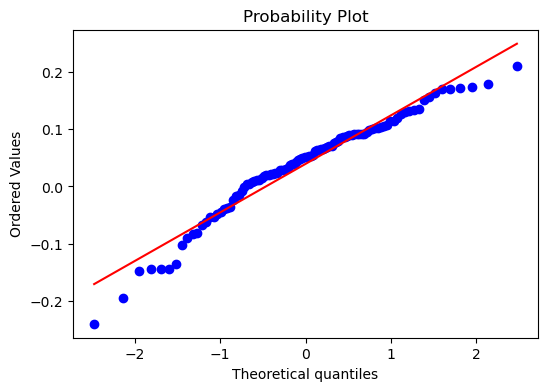

In [804]:
import scipy as sp

residual = Y_pred - y_testing

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)
plt.show()

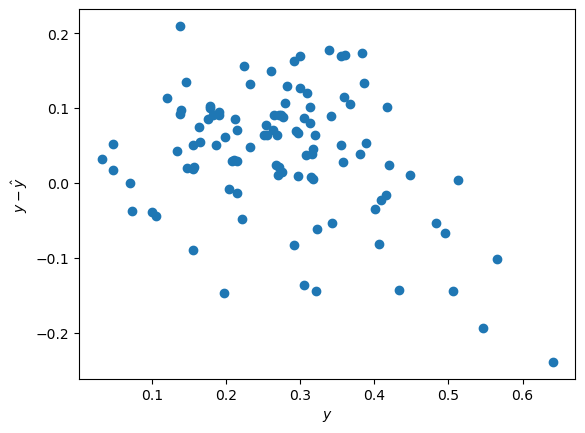

In [805]:
plt.scatter(y_testing, residual)
plt.xlabel('$y$')
plt.ylabel('$y-\hat{y}$')
plt.show()

##### No heteroscedasticity pattern between y_test and residual. The pattern leans more towards homoscedasticity.

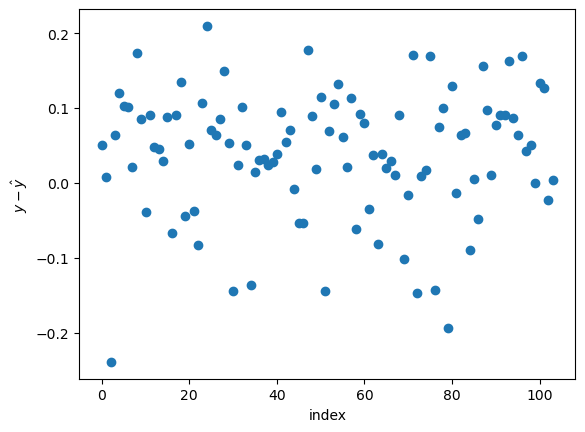

In [806]:
plt.scatter(range(len(y_testing)),residual)
plt.xlabel('index')
plt.ylabel('$y-\hat{y}$')
plt.show()

##### No correlations here

# Question 2 Scikit-learn Linear Regression

In [807]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

## a) Train Model with Scikit-learn

##### Training and Testing split

In [808]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##### Traing the model

In [809]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [810]:
print(model.coef_)
print(model.intercept_)
print(model.score(X_test,y_test))

[-0.10223511 -0.25546793  0.11529964  0.16182469]
0.24083129428228653
0.542822493709362


## b) Making prediction on testing data with model

In [811]:
y_pred = model.predict(X_test)

In [812]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.054590819943829465
MSE: 0.005622398441896507
RMSE: 0.07498265427348186


In [813]:
print("beta1, beta2, beta3, beta 4: " + str(np.round(model.coef_,3)))
print("beta_0: " + str(np.round(model.intercept_,3)))
print("R^2 : %.5f" % model.score(X_test,y_test))

beta1, beta2, beta3, beta 4: [-0.102 -0.255  0.115  0.162]
beta_0: 0.241
R^2 : 0.54282


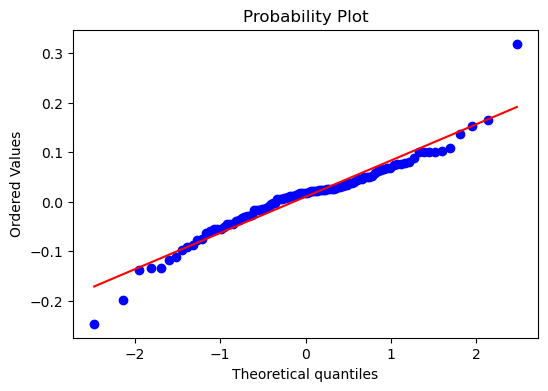

In [814]:
import scipy as sp

residual = y_pred - y_test

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)
plt.show()

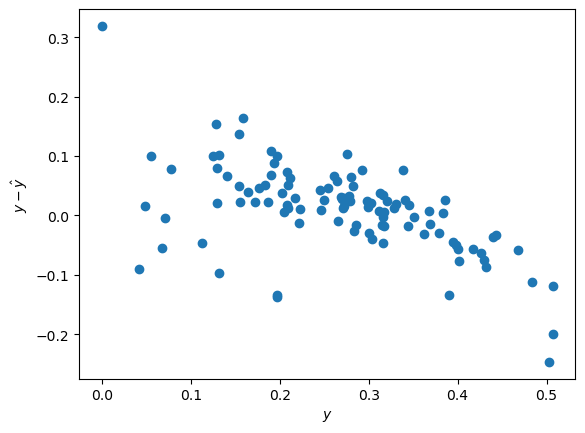

In [815]:
plt.scatter(y_test, residual)
plt.xlabel('$y$')
plt.ylabel('$y-\hat{y}$')
plt.show()

##### No heteroscedasticity pattern between y_test and residual. The pattern leans more towards homoscedasticity.

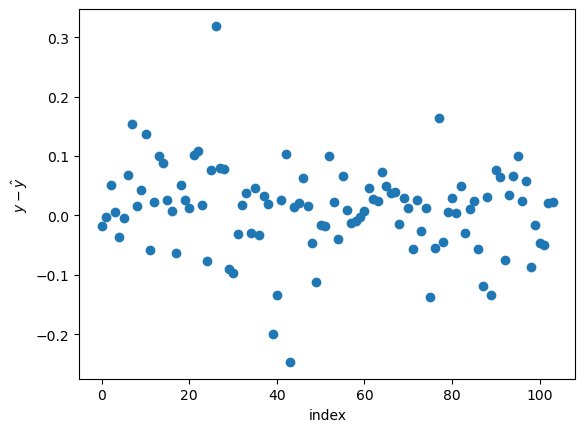

In [816]:
plt.scatter(range(len(y_test)),residual)
plt.xlabel('index')
plt.ylabel('$y-\hat{y}$')
plt.show()

##### No correlations here.

## c) Compare result from Scikit-Learn with that from Question 1

##### After I reach this question I wanted to be able to get the model scores of my model and the scikit-learn model to all display her and compare them side to side. However the now the "model" object is either 1 of them since I used this object for both  models. So I will just comment like this:

##### Overall my model and the Scikit_learn model has given similar results in terms of the predicted weights as well as the MSE scores. I also did similar visualizations for residuals post-prediction and the charts for both models are also similar. 

##### I do notice how the result of both model can constantly shifts if I refresh the model again. But overall the predicted models yields very similar results

##### I do notice that more variations actually come from different learning rates I used for SGD. When the learning rates are higher or too low, the MSE are much higher and the weights look a lot less accurate. The best learning rate seem to be around 0.05~0.1.